Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [501]:
NAME = "Anjana Tissera"
ID = "st123459"

---

# Lab 02: Nonlinear Regression and Overfitting

In Lab 01, we explored the construction of linear regression models. Recall the assumptions we make in linear regression:
- $\textbf{x} \in {\cal X} = \mathbb{R}^n$
- $y \in {\cal Y} = \mathbb{R}$
- The $\textbf{x}$ data are drawn i.i.d. from some (unknown) distribution over ${\cal X}$
- There is a linear relationship between $\textbf{x}$ and $y$ with additive constant-variance Gaussian noise, i.e., $y \sim {\cal N}(\theta^\top \textbf{x}, \sigma^2)$,
  where $\theta \in \mathbb{R}^{n+1}$ is unknown and $\textbf{x}$ is an $n+1$-dimensional vector augemented with a constant value of 1 as its first element.

Today, we consider what we might do when the fourth assumption, linearity, does not hold. We introduce a particular form of nonlinear regression,
*polynomial regression*, in which we account for nonlinear relationships between $\mathbf{x}$ and $y$ by performing nonlinear transformations of
the input variables in $\mathbf{x}$.

As an example, if we had a single input variable $x$, linear regression gives us the hypothesis
$$h_\theta(x) = \theta_0 + \theta_1 x .$$
We can add a new "variable" $x^2$, which is a nonlinear transformation of the input $x$:
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 .$$
The important thing to notice here is that although the hypothesis is *nonlinear* in $x$, allowing us to model a more complex function than
ordinary linear regression, the hypothesis is *linear* in $\theta$, allowing us to use the normal equations to find the optimal $\theta$ as before.

## Polynomial Regression

More generally, polynomial regession is a form of linear regression in which the relationship between the independent variables $\mathbf{x}$ and the dependent
variable $y$ is modelled as a polynomial.

For a single input $x$, the hypothesis in a polynomial regression of degree $d$ is
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_d x^d$$
$$h_\theta(x) = \sum_{i=0}^{d} \theta_i x^i$$

For a multivariate input $\mathbf{x}$, we introduce terms corresponding to every degree-$d$

combination of factors. For example, if $n=3$ and $d=2$, we have
$$h_\theta(\mathbf{x}) = \theta_0
                       + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3
                       + \theta_4 x_1^2 + \theta_5 x_1 x_2 + \theta_6 x_1 x_3
                       + \theta_7 x_2^2 + \theta_8 x_2 x_3 + \theta_9 x_3^2 .$$

## Example 1

Let's take a look at how polynomial regression as compared to simple linear regression model works for data with a
simple quadratic nonlinearity. First, we generate 100 observations from a ground truth quadratic function with Gaussian noise:

In [502]:
import matplotlib.pyplot as plt
import numpy as np
import random

# please do not change the check result will be wrong
np.random.seed(0)
random.seed(0)

In [503]:
# Generate X
m = 100
X = np.random.uniform(-4, 4, (m,1))

# Generate y
a = 0.7
b = 1
c = 2
y = a * X**2 + b * X + c + np.random.randn(m, 1)

In [504]:
print(X[0:5,:])
print(X.shape)

[[ 0.39050803]
 [ 1.72151493]
 [ 0.82210701]
 [ 0.35906546]
 [-0.61076161]]
(100, 1)


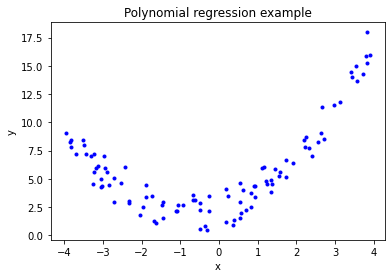

In [505]:
# Plot
plt.plot(X, y, 'b.')
plt.title('Polynomial regression example')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Let's use the normal equations to find the $\theta$ minimizing $J(\theta)$:
$$\mathbf{\theta} = (X^\top X)^{-1}X^\top\mathbf{y}$$

First, we use ordinary linear regression:
$$h_\theta(x) = \theta_0 + \theta_1 x$$
Then, we use polynomial regression with $d=2$:
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 $$ 

## Hypothesis Function

$$ h_\mathbf{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x} . $$

In [506]:
def h(X, theta):
    return X.dot(theta)

## Regression Function

The Regression function can be created from normal equation.

$$\mathbf{\theta} = (X^\top X)^{-1}X^\top\mathbf{y}$$

In [507]:
def regression(X, y):
    cov = np.dot(X.T, X)
    cov_inv = np.linalg.inv(cov)
    theta = np.dot(cov_inv, np.dot(X.T, y))
    return theta

## Exercise 1.1 (2 points)

Create function RMSE (root mean squared error)
$$rms_{error} = \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{m}$$

$$rms_{error} = \sqrt{\frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{m}}$$

In [508]:
def rmse(y, y_pred):
    error = None
    
    # YOUR CODE HERE
    m = y.shape[0]
    error = np.sqrt((np.square(y - y_pred)).sum() / m)
    return error

In [509]:
print(rmse(np.array([1,1.1,2,-1]), np.array([1.1,1.3,1.5,0.1])))

# Test function: Do not remove
assert np.round(rmse(np.array([1,1.1,2,-0.1]), np.array([1.1,1.3,1.5,0.1])), 5) == np.round(0.29154759474226505, 5), "calculate rmse incorrect"
print("success!")
# End Test function

0.6144102863722254
success!


**Expect output:** 0.6144102863722254

## Simple Linear Model

In [510]:
# Add intercept column of all 1's
X_aug = np.insert(X, 0, 1, axis=1)

# Print first 5 rows of X
print(X_aug[0:5,:])

# Find optimal parameters
theta_slr = regression(X_aug, y)

# Predict y
y_pred_slr = h(X_aug, theta_slr)

print('Linear regression RMSE: %f' % rmse(y, y_pred_slr))

[[ 1.          0.39050803]
 [ 1.          1.72151493]
 [ 1.          0.82210701]
 [ 1.          0.35906546]
 [ 1.         -0.61076161]]
Linear regression RMSE: 3.413803


## Exercise 1.2 (2 points)

From the simple linear model at above, create another Linear model by using **polynomial model with d=2**.
 - Create x data in <code>X_aug</code>
 - Find $\theta$ and input to <code>theta_pr</code>

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    
1. Use <code>np.insert</code> to
   - insert **"$x^{n-1}$"** when $n$ is number of $\theta$

In [511]:
# 1. Add constant column and x^2 column
X_aug = None
# 2. Find optimal parameters 
theta_pr = None

# YOUR CODE HERE
X_aug = np.insert(X, 0, 1, axis=1)
X_square = np.square(X.reshape(1,m))
X_aug = np.insert(X_aug, X_aug.shape[1], X_square, axis=1)
print(X_aug[0:5,:])

theta_pr = regression(X_aug, y)
print(theta_pr)


[[ 1.          0.39050803  0.15249652]
 [ 1.          1.72151493  2.96361366]
 [ 1.          0.82210701  0.67585993]
 [ 1.          0.35906546  0.12892801]
 [ 1.         -0.61076161  0.37302974]]
[[2.34050076]
 [0.98429914]
 [0.67175588]]


In [512]:
# Predict y 
y_pred_pr = h(X_aug, theta_pr)
print(X_aug[0:5,:])
print('Polynomial regression RMSE: %f' % rmse(y, y_pred_pr))

# Test function: Do not remove
assert np.array_equal(np.round(theta_pr.T), np.round([[1.90932595, 1.02311816, 0.71747835]])), "theta_pr are incorrect"
assert np.round(X_aug[10,1] ** 2, 5) == np.round(X_aug[10,2], 5), "X_aug are incorrect"
assert np.round(rmse(y, y_pred_pr) ** 2 * y.shape[0], 5) == np.round(np.dot((y - y_pred_pr).T, y - y_pred_pr), 5), "RMSE incorrect"
print("success!")
# End Test function

[[ 1.          0.39050803  0.15249652]
 [ 1.          1.72151493  2.96361366]
 [ 1.          0.82210701  0.67585993]
 [ 1.          0.35906546  0.12892801]
 [ 1.         -0.61076161  0.37302974]]
Polynomial regression RMSE: 0.986690
success!


**Expect output** \
[[ 1.          0.39050803  0.15249652]\
 [ 1.          1.72151493  2.96361366]\
 [ 1.          0.82210701  0.67585993]\
 [ 1.          0.35906546  0.12892801]\
 [ 1.         -0.61076161  0.37302974]]\
Polynomial regression RMSE: 0.986690

We see that the degree 2 polynomial fit is much better, reducing average error from 3.22 to 0.96.

Here's a plot of the predictions vs. observed data:

## Exercise 1.3 (2 points)

Do the **get_prediction function** to predict $\hat{y}$


<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    
1. Use <code>np.insert</code> to
   - insert **"1"** in front of $x$
   - insert **"$x^{n-1}$"** when $n$ is number of $\theta$

    
2. Use **Hypothesis function** to get $\hat{y}$
</details>

In [513]:
def get_predictions(x, theta):
    # Change the shape of x to support the function
    x = np.array([x]).T
    
    y_hat = None
    
    # YOUR CODE HERE    
    n = theta.shape[0]
    m = x.shape[0]
    # Insert "1" in front of  x
    X_aug = np.insert(x, 0, 1, axis=1)
    
    # Insert "x^(n-1) " when  n  is number of  theta
    for i in range(2, n):
        x_n = x**i
        X_aug = np.insert(X_aug, X_aug.shape[1], x_n.reshape(1,m), axis=1)
    
    y_hat = h(X_aug, theta)    
    
    return y_hat

In [514]:
x_series = np.linspace(-4, 4, 1000)
y_series_slr = get_predictions(x_series, theta_slr)
y_series_pr = get_predictions(x_series, theta_pr)

print("y_series_slr:", y_series_slr[2:5].T)
print("y_series_pr:", y_series_pr[2:5].T)

# Test function: Do not remove
assert np.round(get_predictions(np.array([1, 9, 2, -9]), theta_slr).T, 5) is not None, "predict from theta_slr is incorrect"
assert np.round(get_predictions(np.array([1, 1, 0.1, 2]), theta_pr).T, 5) is not None, "predict from theta_pr is incorrect"
print("success!")
# End Test function

y_series_slr: [[2.72462183 2.73101513 2.73740842]]
y_series_pr: [[9.0812643  9.04632656 9.01147497]]
success!


**Expect output**:\
y_series_slr: [[2.72462183 2.73101513 2.73740842]]\
y_series_pr: [[9.0812643  9.04632656 9.01147497]]

## Plot X, y, and the two regression models

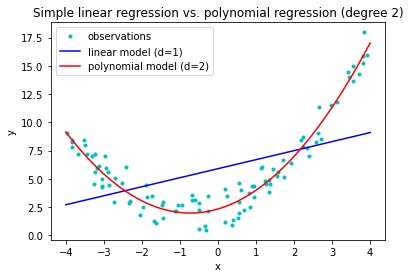

In [515]:
plt.plot(X[:,0], y, 'c.', label='observations')
plt.plot(x_series, y_series_slr, 'b-', label='linear model (d=1)')
plt.plot(x_series, y_series_pr, 'r-', label='polynomial model (d=2)')
plt.title('Simple linear regression vs. polynomial regression (degree 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Besides RMSE, let's also get the $R^2$ for our two models. Recall
\begin{align}
\ R^2 = 1 - \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\bar{y}^\left(i\right) \right)^2}
\end{align}


## Exercise 1.4 (2 points)

Create $R^2$ from equation above

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary> Use <code>np.square</code>
</details>

In [516]:
def r_squared(y, y_pred):
    r_sqr = None
    
    # YOUR CODE HERE    
    y_mean = y.mean()
    residual_sum_of_sq = np.square(y - y_pred).sum()
    total_sum_of_sq = np.square(y - y_mean).sum()
    r_sqr = 1 - (residual_sum_of_sq / total_sum_of_sq)  
    
    return r_sqr

In [517]:
print('Fit of simple linear regression model: %.4f' % r_squared(y, y_pred_slr))
print('Fit of polynomial regression model: %.4f' % r_squared(y, y_pred_pr))

# Test function: Do not remove
assert np.round(r_squared(np.array([1, 2, 3]), np.array([1, 2, 3]))) == np.round(1.0), "r_squared is incorrect"
assert np.round(r_squared(y, y_pred_pr), 4) == np.round(0.9353, 4), "r_squared is incorrect"
print("success!")
# End Test function

Fit of simple linear regression model: 0.2254
Fit of polynomial regression model: 0.9353
success!


**Expect output:**\
Fit of simple linear regression model: 0.2254\
Fit of polynomial regression model: 0.9353

Another useful analysis is to plot histograms of each model's residuals: 

## Exercise 1.5 (2 points)

Find error of
 - <code>error_slr</code> is error from simple linear regression
 - <code>error_pr</code> is error from polynomial linear regression

In [518]:
def residual_error(y, y_pred):
    error = None
    
    # YOUR CODE HERE    
    error = y - y_pred
    return error

error_slr = residual_error(y, y_pred_slr)
error_pr = residual_error(y, y_pred_pr)

error_slr sample: [-4.88494741 -0.58280848 -2.8007543  -5.27887921 -2.27906541]
error_pr sample: [-1.49521216  0.67105966  0.15715854 -1.86746535  1.14869785]


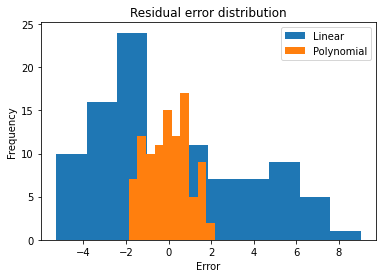

success!


In [519]:
# Plot distribution of residual error for each model
print("error_slr sample:", error_slr[0:5, 0].T)
print("error_pr sample:", error_pr[0:5, 0].T)

plt.hist(error_slr, bins=10, label = 'Linear')
plt.hist(error_pr, bins=10, label = 'Polynomial')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Residual error distribution')
plt.legend()
plt.show()

# Test function: Do not remove
assert np.array_equal(np.round(get_predictions(np.array([1, 9, 2, -9]), theta_slr).T),
                      np.round([[6.70364883, 13.09055058, 7.50201155, -1.27997835]])), "predict from theta_slr is incorrect"
assert np.array_equal(np.round(get_predictions(np.array([0, 7, 1.5, -0.3]), theta_pr).T),
                      np.round([[2.34050076, 42.14663283, 5.3284002, 2.10566904]])), "predict from theta_pr is incorrect"
print("success!")
# End Test function

**Expect output:**\
error_slr sample: [-4.88494741 -0.58280848 -2.8007543  -5.27887921 -2.27906541]\
error_pr sample: [-1.49521216  0.67105966  0.15715854 -1.86746535  1.14869785]

The residual plot shows clearly how much better the polynomial model is than the linear model.

## Example 2

Next, let's model some monthly sales data from Kaggle using polynomial regression with varying degree.

We will observe the effects of varying the degree of the polynomial regression fit on the prediction accuracy.

However, as models become more complex, we will encounter the issue of *overfitting*, in which a too-powerful model starts to model the noise in the specific
training set rather than the overall trend.

To ensure that we're not fitting the noise in the training set, we will split the data into seaparte train and test/validation datasets.
The training dataset will consist of 60% of the original observations, and the test dataset will consist of the remaining 40% of the observations.

For various polynomial degrees, we'll estimate optimal parameters $\theta$, then we'll use the test dataset to measure accuracy of the optimized model.

In [520]:
# Import CSV
data = np.genfromtxt('MonthlySales_data.csv',delimiter = ',', dtype=str)

# Extract headers
headers = data[0,:]
print("Headers:", headers)

# Extract raw data
data = np.array(data[1:,:], dtype=float);
mean = np.mean(data,axis=0)
std = np.std(data,axis=0)
data_norm = (data-mean)/std

# Extract y column from raw data
y_index = np.where(headers == 'sale amount')[0][0];
y_data = data[:,y_index];

# Extract x column (just the month) from raw data
month_index = np.where(headers == 'month')[0][0]
# print(year_index, month_index)
X_data = data[:,[month_index]];
m = X_data.shape[0]
n = X_data.shape[1]
X_data = X_data.reshape(m, n)

print('Extracted %d monthly sales records' % m)
print(X_data.shape)
print(y_data.shape)

Headers: ['year' 'month' 'sale amount']
Extracted 240 monthly sales records
(240, 1)
(240,)


## Plot the data

Plot 3D by using Axes3D

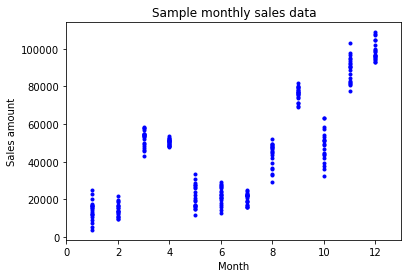

In [521]:
# Plot the data
fig = plt.figure()
xx1 =X_data[:,0]
zz1 =y_data

plt.plot(xx1, zz1, 'b.')
plt.xlim(0, 13)
plt.xlabel('Month')
plt.ylabel('Sales amount')
plt.title('Sample monthly sales data')
plt.show()

## Exercise 1.6 (2 points)

Partion <code>X_data</code> and <code>y_data</code> into training and test datasets
 - Do train set as 60% of all data
 - Other are test set
 - dataset must be shuffle
 
You can use <link>[random.shuffle](https://www.w3schools.com/python/ref_random_shuffle.asp)</link> to shuffle index of dataset

In [522]:
percent_train = .6

def partition(X, y, percent_train):
    # 1. create index list
    idx = np.arange(0,y.shape[0])
    random.seed(1412)   # just make sure the shuffle always the same please do not remove
    # do yourself follow the instruction
    # 2. shuffle index
    # 3. Create train/test index
    # 4. Separate X_Train, y_train, X_test, y_test
    X_train = None
    y_train = None
    X_test = None
    y_test = None
    
    # YOUR CODE HERE
    # 2. shuffle index
    random.shuffle(idx)
    
    # 3. Create train/test index
    m = X.shape[0]
    m_train = int(m * percent_train)
    train_indices = idx[0:m_train]
    test_indices = idx[m_train:]
    
     # 4. Separate X_Train, y_train, X_test, y_test
    X_train = X[train_indices]
    X_test = X[test_indices]    
    
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return idx, X_train, y_train, X_test, y_test

In [523]:
idx, X_train, y_train, X_test, y_test = partition(X_data, y_data, percent_train)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(idx[5:9])

# Test function: Do not remove
assert not np.array_equal(np.round(X_data[0:144, :], 3), np.round(X_train,3)), "X_train must be shuffled!"
assert not np.array_equal(np.round(X_data[144:, :], 3), np.round(X_test,3)), "X_test must be shuffled!"
assert not np.array_equal(np.round(y_data[0:144], 3), np.round(y_train,3)), "y_train must be shuffled!"
assert not np.array_equal(np.round(y_data[144:], 3), np.round(y_test,3)), "y_test must be shuffled!"
assert np.array_equal(idx[5:9], [26, 75, 51, 162])
print("success!")
# End Test function

(144, 1)
(144,)
(96, 1)
(96,)
[ 26  75  51 162]
success!


**Expect output:**\
(144, 1)\
(144,)\
(96, 1)\
(96,)\
[ 26  75  51 162]

## Exercise 1.7 (2 points)

Create <code>x_polynomial</code> function
$$X=[1, x, x^2, ..., x^{n}]$$

when $n$ is number of polynomial set

In [524]:
def x_polynomial(x, n):
    X = None
    
    # YOUR CODE HERE
    x_original = x.copy()
    m = x.shape[0]
    # Insert "1" in front of  x
    X = np.insert(x, 0, 1, axis=1)
    
    # Insert "x^(n-1) " when  n  is number of  theta
    for i in range(2, n+1):
        X = np.append(X, x_original**i, axis=1)
    
    return X

In [525]:
print(x_polynomial(np.array([[3],[2]]), 5))
print(x_polynomial(np.array([[3],[2]]), 5).shape)

Xi_train = x_polynomial(X_train, 1)    
Xi_test = x_polynomial(X_test, 1)

# Test function: Do not remove
assert x_polynomial(np.array([[2],[3]]), 5).shape[1] == 5 + 1, "Size of polynomial incorrect"
assert np.array_equal(np.round(x_polynomial(np.array([[2],[3]]), 5), 3), 
                      np.round([[1, 2, 4, 8, 16, 32], [1, 3, 9, 27, 81, 243]],3)), "Polynomial are wrong."
print("success!")
# End Test function

[[  1   3   9  27  81 243]
 [  1   2   4   8  16  32]]
(2, 6)
success!


**Expect output:**\
[[  1.   3.   9.  27.  81. 243.]\
 [  1.   2.   4.   8.  16.  32.]]\
(2, 6)

## Exercise 1.8 (2 points)

Create <code>cost</code> function ($J$)

In [526]:
def cost(theta,X,y):
    J = None
    
    # YOUR CODE HERE    
    J = None    
    m = X.shape[0]
    J = np.sum(np.square(np.subtract(np.dot(X,theta),y))) / (2 * m)
    return J

In [527]:
# calculate theta
theta = regression(Xi_train, y_train)

# calculate cost in train
J_train = cost(theta, Xi_train, y_train)

y_pred_test = h(Xi_test, theta)
J_test = cost(theta, Xi_test, y_test)

print("J_train:", J_train)
print("J_test:", J_test)

# Test function: Do not remove
assert type(J_train) == np.float64, "Cost function size must be 1"
assert np.round(J_train, 3) == np.round(174395635.44334993, 3), "Cost function in train set are wrong"
assert np.round(J_test, 3) == np.round(196382485.91395777, 3), "Cost function in test set are wrong"
print("success!")
# End Test function

J_train: 174395635.44334996
J_test: 196382485.91395774
success!


**Expect output:**\
J_train: 174395635.44334993\
J_test: 196382485.91395777

In [528]:
print(theta)

[6928.44582392 6354.15590081]


## Mixed together

Build models of degree 1 to max_degree

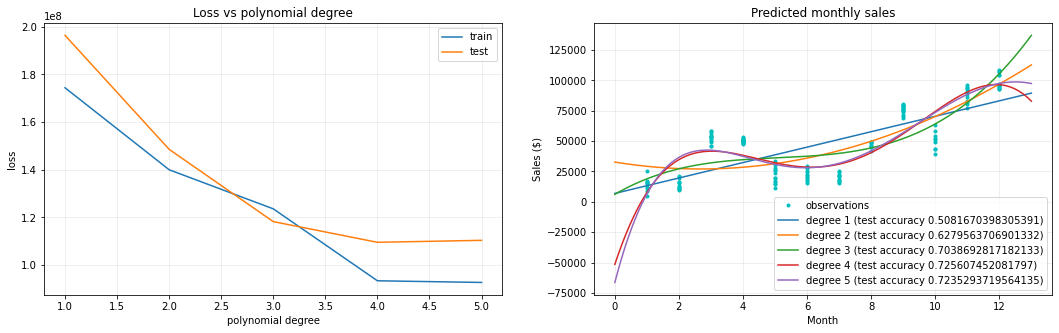

In [529]:
max_degree = 5

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train, y_train, 'c.', label='observations')

for i in range(1, max_degree+1):
    # Fit model on training data and get cost for training and test data
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regression(Xi_train, y_train)    
    J_train[i-1] = cost(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = cost(theta, Xi_test, y_test)
    
    # Plot
    x_series = np.linspace(0, 13, 1000)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Predicted monthly sales')
plt2.set_xlabel('Month')
plt2.set_ylabel('Sales ($)')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()

Take some time to undserstand the code. You should see that training loss falls as the degree of the polynomial increases. However, depending on your particular train/test split of the data, you may observe at $d=4$ or $d=5$ that test loss starts to increase. This is the phenomenon of overfitting!

If you don't see any evidence of overfitting, you might regenerate the test/train splits (rerun the previous cell as well as the training cell).

You may also increase max_degree to a point. However, without normalization of the data, the matrix $\texttt{X}^\top\texttt{X}$ we invert in the solution to the normal equations will become numerically close to singularity, and you will observe unstable solutions. The result is usually a parameter vector $\theta$ that is suboptimal that gives poor results on both the training set and test set.

If you want to evaluate the numerial stability of the correlation matrix $\texttt{X}^\top\texttt{X}$, try this code:

In [530]:
print(J_train)
print(J_test)

[1.74395635e+08 1.39997087e+08 1.23599617e+08 9.34189082e+07
 9.27217908e+07]
[1.96382486e+08 1.48552169e+08 1.18241133e+08 1.09561365e+08
 1.10391116e+08]


In [531]:
corr = Xi_train.T.dot(Xi_train)
print('Correlation matrix:', corr)
cond = np.linalg.cond(corr)
print('Condition number: %0.5g' % cond)

Correlation matrix: [[1.44000000e+02 9.34000000e+02 7.73800000e+03 7.24420000e+04
  7.25962000e+05 7.58679400e+06]
 [9.34000000e+02 7.73800000e+03 7.24420000e+04 7.25962000e+05
  7.58679400e+06 8.15402980e+07]
 [7.73800000e+03 7.24420000e+04 7.25962000e+05 7.58679400e+06
  8.15402980e+07 8.94004282e+08]
 [7.24420000e+04 7.25962000e+05 7.58679400e+06 8.15402980e+07
  8.94004282e+08 9.94854740e+09]
 [7.25962000e+05 7.58679400e+06 8.15402980e+07 8.94004282e+08
  9.94854740e+09 1.11986452e+11]
 [7.58679400e+06 8.15402980e+07 8.94004282e+08 9.94854740e+09
  1.11986452e+11 1.27211760e+12]]
Condition number: 6.5793e+12


Read more about the condition number on <link>[Wikipedia](https://en.wikipedia.org/wiki/Condition_number)</link>. Roughly speaking, if our condition number is $10^k$, we may lose up to $k$ digits of accuracy in the inverse of the matrix. If $k=12$ as above, then we have an extremely poorly conditioned problem, because the IEEE 64 bit floating point representation of reals we're using in Python only has around 16 digits of accuracy (see <link>[Wikipedia's page on IEEE floating point numbers](https://en.wikipedia.org/wiki/IEEE_754)</link>).

One way to improve the numerical conditioning of the problem is normalization. If the values of the variable's we're correlating in this matrix have relatively small positive and negative values, the condition number of the correlation matrix will be much smaller and you'll get better results.

Take some time to undserstand the code. Depending on your random test/train split, you should see that training loss falls as the degree of the polynomial increases.
However, you may observe at some point that test loss starts to increase, and you may see some very strange behavior of the model function beyond the range 1-12.
If not, go ahead and increase the variable `max_degree` until you see an increase in test loss. This is the phenomenon of overfitting!

### Testing by increasing the `max_degree`

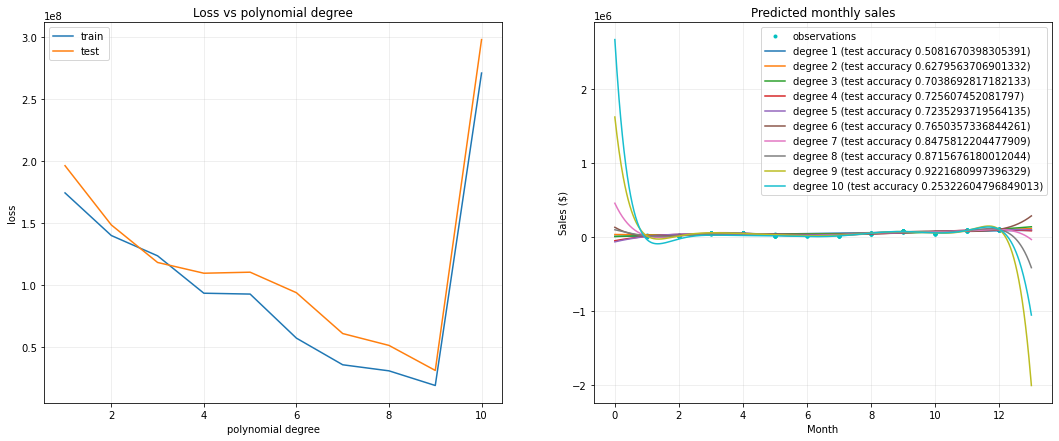

In [532]:
max_degree = 10

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)
r_squared_list_train = np.zeros(max_degree)
r_squared_list_test = np.zeros(max_degree)

# Initalize plots for predictions and loss
fig, ax = plt.subplots(1,2)
fig.set_figheight(7)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt3 = plt.subplot(1,2,1)
plt4 = plt.subplot(1,2,2)
plt4.plot(X_train, y_train, 'c.', label='observations')

for i in range(1, max_degree+1):
    # Fit model on training data and get cost for training and test data
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regression(Xi_train, y_train) 
    # J
    J_train[i-1] = cost(theta, Xi_train, y_train)
    J_test[i-1] = cost(theta, Xi_test, y_test)
    # Presictions
    y_pred_train = h(Xi_train, theta)
    y_pred_test = h(Xi_test, theta)
    # R_squared
    r_squared_list_train[i-1] = r_squared(y_train, y_pred_train)
    r_squared_list_test[i-1] = r_squared(y_test, y_pred_test)    
    
    # Plot
    x_series = np.linspace(0, 13, 1000)
    y_series = get_predictions(x_series, theta)
    plt4.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt3.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt3.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt3.set_title('Loss vs polynomial degree')
plt3.set_xlabel('polynomial degree')
plt3.set_ylabel('loss')
plt3.grid(axis='both', alpha=.25)
plt3.legend()

plt4.set_title('Predicted monthly sales')
plt4.set_xlabel('Month')
plt4.set_ylabel('Sales ($)')
plt4.grid(axis='both', alpha=.25)
plt4.legend()
plt.show()

In [533]:
print(r_squared_list_train)
print(r_squared_list_test)

[0.57455587 0.65847231 0.6984745  0.77210137 0.77380201 0.86060122
 0.91304131 0.92497741 0.9538504  0.33849507]
[0.50816704 0.62795637 0.70386928 0.72560745 0.72352937 0.76503573
 0.84758122 0.87156762 0.9221681  0.25322605]


## In-lab exercise

During the lab session, you should perform the following exercises:
1. Add the `year` variable from the monthly sales dataset to your simple linear regression model and quantify whether including it improves test set performance. Show
   the observations and predictions in a 3D surface plot.
2. Develop polynomial regression models of degree 2 and 3 based on the two input variables. Show results as 3D surface plots and discuss whether you observe overfitting
   or not.

## Exercise 2.1 (2 points)

Import **MonthlySales_data.csv** file into <code>data_csv</code> and extract **headers**  at the top of <code>data_csv</code> into <code>headers_csv</code>

In [534]:
headers_csv = None
data_csv = None
# YOUR CODE HERE
data_csv = np.genfromtxt('MonthlySales_data.csv',delimiter = ',', dtype=str)
headers_csv = data_csv[0,:]
data_csv = np.array(data_csv[1:,:], dtype=float)

In [535]:
print(headers_csv)
print(data_csv[:5])

# Test function: Do not remove
assert type(data_csv[0,0]) == np.float64, "You must remove the header"
assert headers_csv.shape[0] == 3, "Headers must have 3 values"
assert type(headers_csv[0]) == np.str_, "Headers must be string"
assert np.round(data_csv[30, 2], 3) == np.round(2.222027e+04, 3), "Data is incorrect"
print("success!")
# End Test function

['year' 'month' 'sale amount']
[[1.995000e+03 1.000000e+00 1.238611e+04]
 [1.995000e+03 2.000000e+00 1.532923e+04]
 [1.995000e+03 3.000000e+00 5.800217e+04]
 [1.995000e+03 4.000000e+00 5.130520e+04]
 [1.995000e+03 5.000000e+00 1.645247e+04]]
success!


**Expect output**:\
['year' 'month' 'sale amount']\
[[1.995000e+03 1.000000e+00 1.238611e+04]\
 [1.995000e+03 2.000000e+00 1.532923e+04]\
 [1.995000e+03 3.000000e+00 5.800217e+04]\
 [1.995000e+03 4.000000e+00 5.130520e+04]\
 [1.995000e+03 5.000000e+00 1.645247e+04]]

## Exercise 2.2 (2 points)

- Extract **sale amount** column into <code>y_csv</code>
- Extract **year** and **month** columns into <code>X_csv</code> by use **year** at column index 0 and **month** at column index 1

In [536]:
# Extract y column from raw data
# Extract x column (year and month) from raw data
y_csv = None
X_csv = None
# YOUR CODE HERE
y_index = np.where(headers_csv == 'sale amount')[0][0]
y_csv = data_csv[:,y_index]

year_index = np.where(headers_csv == 'year')[0][0]
month_index = np.where(headers_csv == 'month')[0][0]
X_csv = data_csv[:,[year_index,month_index]]

print(y_csv[:5])
print(X_csv[:5])

[12386.11 15329.23 58002.17 51305.2  16452.47]
[[1.995e+03 1.000e+00]
 [1.995e+03 2.000e+00]
 [1.995e+03 3.000e+00]
 [1.995e+03 4.000e+00]
 [1.995e+03 5.000e+00]]


In [537]:
m = X_csv.shape[0]
n = X_csv.shape[1]
X_csv = X_csv.reshape(m, n)
print('Extracted %d sales records' % m)
print('number of x set:', n)

# Test function: Do not remove
assert m == 240, "Sales records incorrect"
assert n == 2, "Need to extract 2 columns of X set"
assert np.max(X_csv[:,0]) == 2014 and np.min(X_csv[:,0]) == 1995, "Year is filled wrong column"
assert np.max(X_csv[:,1]) == 12 and np.min(X_csv[:,1]) == 1, "Month is filled wrong column "
print("success")
# End Test function

Extracted 240 sales records
number of x set: 2
success


**Expect output**:\
Extracted 240 sales records\
number of x set: 2

## Exercise 2.3 (2 points)

- Plot 3D graph using <code>mpl_toolkits.mplot3d</code>

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
Please see https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html for example
</details>

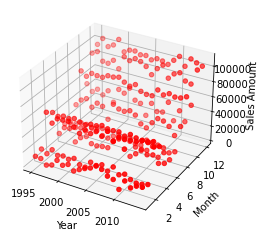

In [538]:
# Plot the data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
# 1. Set plot graph as 3D
ax = fig.add_subplot(projection='3d')

# 2. Extract data
# extract year at x-axis
# extract month at y-axis
# extract sale amount at z-axis
x_year = None
y_month = None
z_sale = None

# 3. plot by using scatter

# 4. set x, y, z label

# YOUR CODE HERE

# 2. Extract data
x_year = X_csv[:,[0]]
y_month = X_csv[:,[1]]
z_sale = y_csv

# 3. plot by using scatter
ax.scatter(x_year, y_month, z_sale, c='r', marker='o')

# 4. set x, y, z label
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_zlabel('Sales Amount')

plt.show()

In [539]:
# Test function: Do not remove
assert ax.get_xbound()[1] >= 2014 and ax.get_xbound()[0] <= 1995, "Year is filled wrong column"
assert ax.get_ybound()[1] >= 12 and ax.get_ybound()[0] <= 1, "Month is filled wrong column"
assert ax.get_zbound()[1] >= 100000 and ax.get_zbound()[0] <= 0, "Year is filled wrong column"
assert 'year' in ax.get_xlabel().lower(), "x-axis label is incorrect"
assert 'month' in ax.get_ylabel().lower(), "y-axis label is incorrect"
assert 'sale' in ax.get_zlabel().lower(), "y-axis label is incorrect"
print("success")
# End Test function

success


**Expect output:**\
<img src="lab02-01.png">

## Exercise 2.4 (2 points)

Extract data to 60% of training set and 40% of test set with shuffle

 - You can use <code>partitions</code> function or create your new function and make sure that you must use <code>random.seed(1412)</code> in the code (to make sure that the result will be the same as the expect result)
 - Please use <code>idx, X_train, y_train, X_test, y_test</code> for the answer result.

In [540]:
idx, X_train, y_train, X_test, y_test = None, None, None, None, None

# YOUR CODE HERE
def partition_m_n(X, y, percent_train):
    # 1. create index list
    idx = np.arange(0,m)
    random.seed(1412) 

    X_train = None
    y_train = None
    X_test = None
    y_test = None
    
    # 2. shuffle index
    random.shuffle(idx)
    
    # 3. Create train/test index
    m_train = int(m * percent_train)
    train_indices = idx[0:m_train]
    test_indices = idx[m_train:]
    
     # 4. Separate X_Train, y_train, X_test, y_test
    X_train = X[train_indices,:]
    X_test = X[test_indices,:]    
    
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return idx, X_train, y_train, X_test, y_test

percent_train = .6
idx, X_train, y_train, X_test, y_test = partition_m_n(X_csv, y_csv, percent_train)

In [541]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(idx[5:9])

# Test function: Do not remove
assert not np.array_equal(np.round(X_csv[0:144, :], 3), np.round(X_train,3)), "X_train must be shuffled!"
assert not np.array_equal(np.round(X_csv[144:, :], 3), np.round(X_test,3)), "X_test must be shuffled!"
assert not np.array_equal(np.round(y_csv[0:144], 3), np.round(y_train,3)), "y_train must be shuffled!"
assert not np.array_equal(np.round(y_csv[144:], 3), np.round(y_test,3)), "y_test must be shuffled!"
assert np.array_equal(idx[5:9], [26, 75, 51, 162])
print("success!")
# End Test function

(144, 2)
(144,)
(96, 2)
(96,)
[ 26  75  51 162]
success!


**Expect output**:\
(144, 2)\
(144,)\
(96, 2)\
(96,)\
[ 26  75  51 162]

## Exercise 2.5 (2 points)

- Create <code>Xi_train, Xi_Test</code>. X sets must be polynomial of $n=1$.
- Calculate <code>theta</code>
- Calculate <code>y_pred_test</code>
- Calculate cost function $J$ from train and test set

$$X1 = [1,x_1, x_2]$$

$$X2 = [1,x_1, x_2, x_1x_2, x_1^2, x_2^2]$$

In [542]:
Xi_train, Xi_test = None, None
theta = None
y_pred_test = None
J_train, J_test = None, None

# YOUR CODE HERE
Xi_train = x_polynomial(X_train, 1)    
Xi_test = x_polynomial(X_test, 1)

theta = regression(Xi_train, y_train)
y_pred_test = h(Xi_test, theta)

J_train = cost(theta, Xi_train, y_train)
J_test = cost(theta, Xi_test, y_test)

In [543]:
print("Xi_train[:3]:", np.round(Xi_train[:3], 2))
print("Xi_test[:3]:", np.round(Xi_test[:3], 2))
print("theta:", theta)
print("y_pred_test[:5]:", np.round(y_pred_test[:5].T, 2))
print("J_train:", J_train)
print("J_test:", J_test)

# Test function: Do not remove
assert np.array_equal(np.round(theta, 3), np.round([5.74503812e+05, -2.83158807e+02, 6.37579347e+03],3)), "Regression theta is incorrect"
assert np.round(J_train, 0) == np.round(172968387.44854635, 0), "Train cost is incorrect"
assert np.round(J_test, 0) == np.round(204275431.7643744, 0), "Test cost is incorrect"
print("success")
# End Test function

Xi_train[:3]: [[1.000e+00 2.003e+03 1.100e+01]
 [1.000e+00 2.004e+03 3.000e+00]
 [1.000e+00 2.002e+03 6.000e+00]]
Xi_test[:3]: [[1.000e+00 2.008e+03 1.000e+01]
 [1.000e+00 1.997e+03 5.000e+00]
 [1.000e+00 2.006e+03 1.100e+01]]
theta: [ 5.74503812e+05 -2.83158807e+02  6.37579347e+03]
y_pred_test[:5]: [69678.86 40914.64 76620.97 79169.4  48852.53]
J_train: 172968387.44854635
J_test: 204275431.7643744
success


**Expect output**:\
Xi_train[:3]: [[1.000e+00 2.003e+03 1.100e+01]\
 [1.000e+00 2.004e+03 3.000e+00]\
 [1.000e+00 2.002e+03 6.000e+00]]\
Xi_test[:3]: [[1.000e+00 2.008e+03 1.000e+01]\
 [1.000e+00 1.997e+03 5.000e+00]\
 [1.000e+00 2.006e+03 1.100e+01]]\
theta: [5.74503812e+05 -2.83158807e+02  6.37579347e+03]\
y_pred_test[:5]: [69678.86 40914.64 76620.97 79169.4  48852.53]\
J_train: 172968387.44854635\
J_test: 204275431.7643744

## Exercise 2.6 (2 points)

Create **mesh grid point** to plot **surface**

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
Create Mesh grid from numpy.meshgrid (link: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)\
</details>

In [544]:
# 1. Create mesh grid x_mesh, y_mesh
#    Hint: this step do in input X dataset only (year, and month series)
# 1.1 use numpy.linspace() to generate x_series and y_series
#     - do x_series in between min(year) - 1 to max(year) + 1
#     - do y_series in between min(month) - 1 to max(month) + 1
#     - num_linspace = 100
# 1.2 use numpy.meshgrid() to generate x_mesh, and y_mesh
# 1.3 merge x_mesh and y_mesh to be xy_mesh
num_linspace = 100
x_series, y_series = None, None
x_mesh, y_mesh, xy_mesh = None, None, None

# 2. predict output from xy_mesh to be z_series
#    Hint: use mesh_predictions function instead of get_prediction
def mesh_predictions(x, theta):
    x = np.insert(x, 0, 1, axis=x.ndim-1)
    theta = theta.reshape(-1,1)
    y = x@theta
    return y
z_series = None

# YOUR CODE HERE
# 1. Create mesh grid x_mesh, y_mesh
#1.1 use numpy.linspace() to generate x_series and y_series
X_min = X_csv.min(axis=0)
X_max = X_csv.max(axis=0)
x_series = np.linspace(int(X_min[0]-1), int(X_max[0]+1), num_linspace)
y_series = np.linspace(int(X_min[1]-1), int(X_max[1]+1), num_linspace)
# 1.2 use numpy.meshgrid() to generate x_mesh, and y_mesh
x_mesh, y_mesh = np.meshgrid(x_series, y_series)

# 1.3 merge x_mesh and y_mesh to be xy_mesh
xy_mesh = np.append(x_mesh[..., np.newaxis], y_mesh[..., np.newaxis], axis=2 )

# 2. predict output from xy_mesh to be z_series
z_series = mesh_predictions(xy_mesh, theta).reshape(100,100)

In [545]:
print(x_mesh.shape, y_mesh.shape)
print(xy_mesh.shape)

(100, 100) (100, 100)
(100, 100, 2)


In [546]:
print("xy_mesh.shape", xy_mesh.shape)
print("z_series.shape", z_series.shape)
#print("xy_mesh", xy_mesh)
#print("z_series", z_series)

# Test function: Do not remove
assert xy_mesh.shape == (num_linspace, num_linspace, 2), "mesh shape is incorrect"
assert z_series.shape == (num_linspace, num_linspace), "z_series is incorrect"
print("success")
# End Test function

xy_mesh.shape (100, 100, 2)
z_series.shape (100, 100)
success


**Expect output**:\
xy_mesh.shape (100, 100, 2)\
z_series.shape (100, 100)

## Exercise 2.6 (2 points)

Plot **surface** of theta with the dataset points from xy_mesh and z_series above.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
You can use Axes3D.plot_surface in the link: https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html
</details>

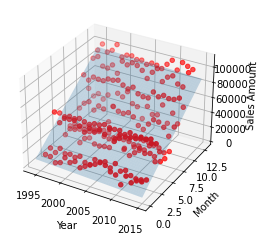

In [547]:
fig = plt.figure()
# 1. Set plot graph as 3D
ax = fig.add_subplot(projection='3d')

# 2. Extract data
# extract year at x-axis
# extract month at y-axis
# extract sale amount at z-axis
x_year = None
y_month = None
z_sale = None

# 3. plot by using scatter
# 4. set x, y, z label
#    Hint: In these 3, 4 steps, you can copy Exercise 2.3
# 5. Plot surface from x_mesh, y_mesh, and z_series

# YOUR CODE HERE

# 2. Extract data
x_year = X_csv[:,0]
y_month = X_csv[:,1]
z_sale = y_csv

# 3. plot by using scatter
ax.scatter(x_year, y_month, z_sale, c='r', marker='o')

# 4. set x, y, z label
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_zlabel('Sales Amount')

# 5. Plot surface from x_mesh, y_mesh, and z_series
ax.plot_surface(x_mesh, y_mesh, z_series, alpha=0.25)

plt.show()

In [548]:
# Test function: Do not remove
assert ax.get_xbound()[1] >= 2014 and ax.get_xbound()[0] <= 1995, "Year is filled wrong column"
assert ax.get_ybound()[1] >= 12 and ax.get_ybound()[0] <= 1, "Month is filled wrong column"
assert ax.get_zbound()[1] >= 100000 and ax.get_zbound()[0] <= 0, "Year is filled wrong column"
assert 'year' in ax.get_xlabel().lower(), "x-axis label is incorrect"
assert 'month' in ax.get_ylabel().lower(), "y-axis label is incorrect"
assert 'sale' in ax.get_zlabel().lower(), "y-axis label is incorrect"
print("success")
# End Test function

success


**Expect result:**
<img src="lab02-02.png">

## Exercise 2.7 (20 points)

Develop polynomial regression models of degree 2 and 3 based on the two input variables. Show results as 3D surface plots and discuss whether you observe overfitting or not.

3D plot: Polynomial degree 2 



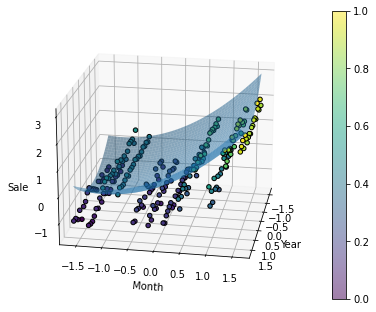

3D plot: Polynomial degree 3 



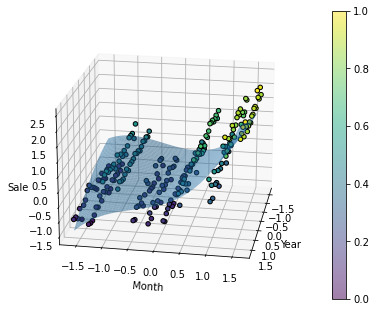

In [549]:
data_csv = (data-np.mean(data, axis = 0))/np.std(data, axis = 0)
y_label = 'sale amount';
y_index = np.where(headers == y_label)[0][0];
y = data_csv[:,y_index];                      
X = data_csv[:,0:y_index];                 
m = data_norm.shape[0]

percent_train = .6
random.shuffle(idx)
    
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:m+1]

X_train = data_csv[train_idx, 0:y_index];
X_test = data_csv[test_idx, 0:y_index];
y_train = data_csv[train_idx, y_index];
y_test = data_csv[test_idx, y_index];

#=============================

# Polynomial regression model d=2, 3
for i in range(2):
    Xi_train = x_polynomial(X_train, i + 2)    
    Xi_test = x_polynomial(X_test, i + 2)

    theta = regression(Xi_train, y_train)
    J_train = cost(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test = cost(theta, Xi_test, y_test)   

    # 3D plot
    print("3D plot: Polynomial degree",i + 2,"\n")
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    x_year = data_csv[:, 0]
    y_month = data_csv[:, 1]
    z_sale = data_csv[:, 2]

    # 3. plot by using scatter
    p = ax.scatter(x_year,y_month, z_sale,edgecolors='black', c=data_norm[:,2],alpha=1)

    # 4. set x, y, z label
    ax.set_xlabel('Year')
    ax.set_ylabel('Month')
    ax.set_zlabel('Sale')

    # plot observation
    x_series = np.linspace(min(data_csv[:,0]), max(data_csv[:,0]),len(y_csv))
    y_series = np.linspace(min(data_csv[:,1]), max(data_csv[:,1]),len(y_csv))

    x_mesh, y_mesh = np.meshgrid(x_series, y_series)
    
    if i == 0: # degree 2
        yy =(theta[0] +theta[1]*x_mesh.T+theta[2]*y_mesh+theta[3]*(x_mesh*y_mesh)+theta[4]*(y_mesh**2+x_mesh**2))
    else: # degree 3
        yy=(theta[0]+theta[1]*(x_mesh+y_mesh).T+theta[2]*x_mesh*y_mesh +theta[3]*x_mesh**2+theta[4]*y_mesh**2+theta[5]* y_mesh*x_mesh**2+theta[6]*y_mesh**3)

    p = ax.plot_surface(x_mesh, y_mesh,yy,alpha=0.5)
    ax.view_init(elev=20, azim=10)
    plt.colorbar(p)
    plt.show()

## Exercise 2 - Discussion

In [550]:
max_degree = 3

In [551]:
# Load Data
data_csv = np.genfromtxt('MonthlySales_data.csv',delimiter = ',', dtype=str)
headers_csv = data_csv[0,:]
data_csv = np.array(data_csv[1:,:], dtype=float)

In [552]:
# Normalize
data_norm = (data_csv-np.mean(data_csv, axis = 0))/np.std(data_csv, axis = 0)

In [553]:
#Test train indexes
m = data_norm.shape[0]
percent_train = .6
idx = np.arange(0,m)
random.seed(1412)
random.shuffle(idx)
    
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:m+1]

### Polynomial regression - `month` variable only (dataset - normalize)

In [554]:
# Month only analysis for degree 1,2 and 3
# Extract y column from raw data
y_index = np.where(headers == 'sale amount')[0][0];
y = data_norm[:,y_index];

# Extract x column (just the month) from raw data
month_index = np.where(headers == 'month')[0][0]
# print(year_index, month_index)
X = data_norm[:,[month_index]];
m = X.shape[0]
n = X.shape[1]
X = X.reshape(m, n)


#Test train split
X_train = X[train_idx, :];
X_test = X[test_idx, :];
y_train = y[train_idx];
y_test = y[test_idx];

#print(X_train.shape, X_test.shape)

# Obtaining statistics for degree 1, 2 and 3
J_train_month = np.zeros(max_degree)
J_test_month = np.zeros(max_degree)
rmse_list_train_month = np.zeros(max_degree)
r_squared_list_train_month = np.zeros(max_degree)
rmse_list_test_month = np.zeros(max_degree)
r_squared_list_test_month = np.zeros(max_degree)
residual_error_list_month = np.array([])

for i in range(1, max_degree+1):
    # Fit model on training data and get cost for training and test data
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regression(Xi_train, y_train)
    # J
    J_train_month[i-1] = cost(theta, Xi_train, y_train)
    J_test_month[i-1] = cost(theta, Xi_test, y_test)
    # Predictions
    y_pred_train = h(Xi_train, theta)
    y_pred_test = h(Xi_test, theta) 
    # RMSE
    rmse_list_train_month[i-1] = rmse(y_train, y_pred_train)
    rmse_list_test_month[i-1] = rmse(y_test, y_pred_test)
    # r_squared
    r_squared_list_train_month[i-1] = r_squared(y_train, y_pred_train)    
    r_squared_list_test_month[i-1] = r_squared(y_test, y_pred_test) 
    # Test Residual errors 
    res_error = residual_error(y_test, y_pred_test).reshape(1, y_test.shape[0])
    if i == 1:
        residual_error_list_month = res_error
    else:    
        residual_error_list_month = np.append(residual_error_list_month, res_error, axis=0)
    


In [555]:
print(J_train_month)
print(J_test_month)

[0.21306314 0.17103764 0.15100448]
[0.23992497 0.18148958 0.1444579 ]


In [556]:
print(rmse_list_train_month)
print(rmse_list_test_month)

[0.65278348 0.58487203 0.54955342]
[0.69271202 0.60247752 0.53750888]


In [557]:
print(r_squared_list_train_month)
print(r_squared_list_test_month)

[0.57455587 0.65847231 0.6984745 ]
[0.50816704 0.62795637 0.70386928]


### Polynomial regression - with `month` and `year` variables (dataset - normalize)

In [558]:
 # Year and Month analysis for degree 1,2 and 3

# Extract X and y
y_label = 'sale amount';
y_index = np.where(headers == y_label)[0][0];
y = data_norm[:,y_index];                      
X = data_norm[:,0:y_index]; 

#Test train split
X_train = X[train_idx, 0:y_index];
X_test = X[test_idx, 0:y_index];
y_train = y[train_idx];
y_test = y[test_idx];

#=============================

# Obtaining statistics for degree 1, 2 and 3
J_train_yr_month = np.zeros(max_degree)
J_test_yr_month = np.zeros(max_degree)
rmse_list_train_yr_month = np.zeros(max_degree)
r_squared_list_train_yr_month = np.zeros(max_degree)
rmse_list_test_yr_month = np.zeros(max_degree)
r_squared_list_test_yr_month = np.zeros(max_degree)
residual_error_list_yr_month = np.array([])

for i in range(1, max_degree+1):
    # Fit model on training data and get cost for training and test data
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regression(Xi_train, y_train)
    # J
    J_train_yr_month[i-1] = cost(theta, Xi_train, y_train)
    J_test_yr_month[i-1] = cost(theta, Xi_test, y_test)
    # Predictions
    y_pred_train = h(Xi_train, theta)
    y_pred_test = h(Xi_test, theta) 
    # RMSE
    rmse_list_train_yr_month[i-1] = rmse(y_train, y_pred_train)
    rmse_list_test_yr_month[i-1] = rmse(y_test, y_pred_test)
    # r_squared
    r_squared_list_train_yr_month[i-1] = r_squared(y_train, y_pred_train)    
    r_squared_list_test_yr_month[i-1] = r_squared(y_test, y_pred_test) 
    # Test Residual errors 
    res_error = residual_error(y_test, y_pred_test).reshape(1, y_test.shape[0])
    if i == 1:
        residual_error_list_yr_month = res_error
    else:    
        residual_error_list_yr_month = np.append(residual_error_list_yr_month, res_error, axis=0)
    


### Plot of loss vs polynomial degree for (`month`) only case and (`month`, `year`) case

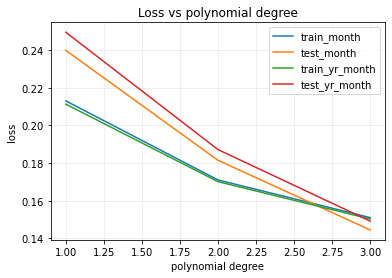

In [559]:
# Plot loss vs polynomial degree
fig = plt.figure()  
plt.plot(np.arange(1, max_degree + 1, 1), J_train_month, '-', label='train_month')
plt.plot(np.arange(1, max_degree + 1, 1), J_test_month, '-', label='test_month')
plt.plot(np.arange(1, max_degree + 1, 1), J_train_yr_month, '-', label='train_yr_month')
plt.plot(np.arange(1, max_degree + 1, 1), J_test_yr_month, '-', label='test_yr_month')
plt.xlabel('polynomial degree')
plt.ylabel('loss')
plt.title('Loss vs polynomial degree')
plt.grid(axis='both', alpha=.25)
plt.legend()

plt.show()

In [560]:
print(J_train_yr_month)
print(J_test_yr_month)

[0.21131943 0.17012235 0.15027084]
[0.24956797 0.18717851 0.14915388]


In [561]:
print(rmse_list_train_yr_month)
print(rmse_list_test_yr_month)

[0.65010681 0.58330499 0.54821682]
[0.70649553 0.61184722 0.54617559]


In [562]:
print(r_squared_list_train_yr_month)
print(r_squared_list_test_yr_month)

[0.57803769 0.66029996 0.69993942]
[0.48839944 0.61629438 0.69424277]


### Residual error distributions

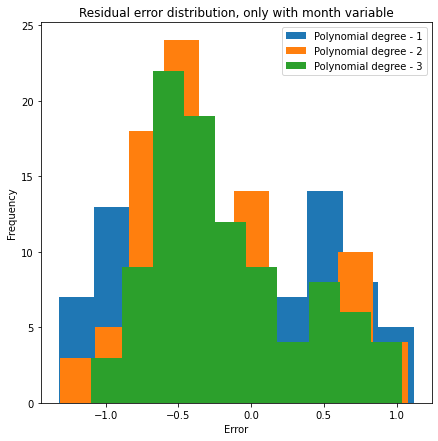

In [563]:
# Plot Testing residual error distribution
plt.figure(figsize=(7,7))
for i in range(1, max_degree+1):
    label_i = "Polynomial degree - " + str(i)
    plt.hist(residual_error_list_month[i-1], bins=10, label = label_i)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Residual error distribution, only with month variable')
plt.legend()

plt.show()

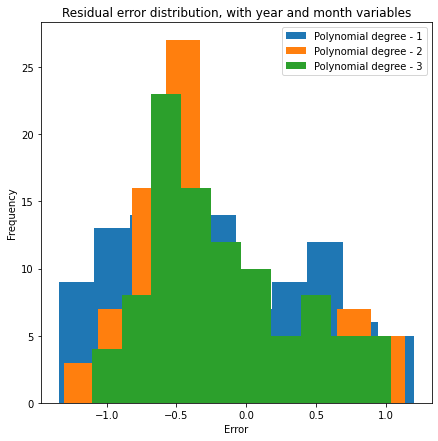

In [564]:
# Plot Testing residual error distribution
plt.figure(figsize=(7,7))
for i in range(1, max_degree+1):
    label_i = "Polynomial degree - " + str(i)
    plt.hist(residual_error_list_yr_month[i-1], bins=10, label = label_i)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Residual error distribution, with year and month variables')
plt.legend()

plt.show()

### Effect of introducing year variable

- Cost comparison

| Polynomial degree  |  $J_{train}$ month only | $J_{test}$ month only  | $J_{train}$ month and year | $J_{test}$ month and year |
| :----: | --- | --- | --- | --- |
| 1 | 0.21306314 | 0.23992497 | 0.21131943   | 0.24956797 |
| 2 | 0.17103764 | 0.18148958 | 0.17012235 | 0.18717851 |
| 3 | 0.15100448 | 0.1444579 |  0.15027084 | 0.14915388 |



- $R^2$ squared comparison

| Polynomial degree  |  $R^2_{train}$ month only | $R^2_{test}$ month only  | $R^2_{train}$ month and year | $R^2_{test}$ month and year |
| :----: | --- | --- | --- | --- |
| 1 | 0.57455587 | 0.50816704 | 0.57803769   | 0.48839944 |
| 2 | 0.65847231 | 0.62795637 | 0.66029996 | 0.61629438 |
| 3 | 0.6984745 | 0.70386928 |  0.69993942 | 0.69424277 |

In this experiment, for `month` only case as well as the `month` and `year` case, I evaluated polynomial regression models only with degree 1,2 and 3.

In both cases, the experiment was performed on normalized data.

By comparing the values in the cost comparison table we can see that when the `year` variable is introduced there is a reduction in the training cost. However, when it is introduced, testing costs are higher compared to `month`-only case. This can be observed from the loss plot graph above as well.

We can see similar behavior in $R^2$ values as well. When the `year` variable is introduced, in the training dataset, $R^2$ is slightly closer to 1 compared to `month`-only case. But, for the testing dataset, $R^2$ values are better when the model is trained only with the `month` variable.

Also, from the test dataset residual error distribution plot, we can observe that introducing the `year` variable, does not significantly change residual errors.

Therefore, my conclusion is that including the year variable does not improve the test set performance.


### Polynomial regression model with `year` and `month` - Overfitting

By observing the model for polynomials of degree 1, 2, and 3, we can see that:
- When the degree is increased, both training and testing cost decreases, and there is no big disparity between training and testing costs up to degree 3

- When the degree is increased, both training and testing goodness of fit $R^2$, improves.

Therefore in the regression model with `year` and `month` there is no overfitting at degree 2 and 3.






## Exercise 3 Take-home exercise (50 points)

Using the dataset you played with for the take-home exercise in Lab 01, perform the same analysis. You won't be able to visualize the model well, as you will have more
than two inputs, but try to give some idea of the performance of the model visually. Also, depending on the number of variables in your dataset, you may not be able to
increase the polynomial degree beyond 2. Discuss whether the polynomial model is better than the linear model and whether you observe overfitting.

### Write all code in youre new file

## To turn in

Before the next lab, turn in a brief report in the form of a Jupyter notebook documenting your work in the lab and the take-home exercise, along with your observations
and discussion.

## Exercise 3 - polynomial regression with `Housing_data.txt` from lab class 1

### Exercise 3 - Implementation

In [565]:
max_degree = 3

In [566]:
# Load Data
data_csv = np.genfromtxt('Housing_data.txt',delimiter = ',', dtype=str)
headers_csv = data_csv[0,:]
data_csv = np.array(data_csv[1:,:], dtype=float)

In [567]:
print(headers_csv)

['Square Feet' ' Number of bedrooms' 'Price']


In [568]:
print(data_csv.shape)

(47, 3)


In [569]:
print(data_csv[:2,:])

[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]]


In [570]:
# Normalize
data_norm = (data_csv-np.mean(data_csv, axis = 0))/np.std(data_csv, axis = 0)

In [571]:
#Test train indexes
m = data_norm.shape[0]
percent_train = .7
idx = np.arange(0,m)
random.seed(10)
random.shuffle(idx)
    
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:m+1]

In [572]:
# Extract X and y
y_label = 'Price';
y_index = np.where(headers_csv == y_label)[0][0];
y = data_norm[:,y_index];                      
X = data_norm[:,0:y_index]; 

#Test train split
X_train = X[train_idx, 0:y_index]
X_test = X[test_idx, 0:y_index]
y_train = y[train_idx]
y_test = y[test_idx]

In [573]:
print(X.shape, y.shape)
print(X_train.shape, X_test.shape)

(47, 2) (47,)
(32, 2) (15, 2)


In [574]:
# Obtaining statistics for degree 1, 2 and 3
J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)
rmse_list_train = np.zeros(max_degree)
r_squared_list_train = np.zeros(max_degree)
rmse_list_test = np.zeros(max_degree)
r_squared_list_test = np.zeros(max_degree)
residual_error_list = np.array([])

In [575]:
# Model fitting
for i in range(1, max_degree+1):
    # Fit model on training data and get cost for training and test data
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regression(Xi_train, y_train)
    # J
    J_train[i-1] = cost(theta, Xi_train, y_train)
    J_test[i-1] = cost(theta, Xi_test, y_test)
    # Predictions
    y_pred_train = h(Xi_train, theta)
    y_pred_test = h(Xi_test, theta) 
    # RMSE
    rmse_list_train[i-1] = rmse(y_train, y_pred_train)
    rmse_list_test[i-1] = rmse(y_test, y_pred_test)
    # r_squared
    r_squared_list_train[i-1] = r_squared(y_train, y_pred_train)    
    r_squared_list_test[i-1] = r_squared(y_test, y_pred_test) 
    # Test Residual errors 
    res_error = residual_error(y_test, y_pred_test).reshape(1, y_test.shape[0])
    if i == 1:
        residual_error_list = res_error
    else:    
        residual_error_list = np.append(residual_error_list, res_error, axis=0)

### Plot of loss vs polynomial degree 

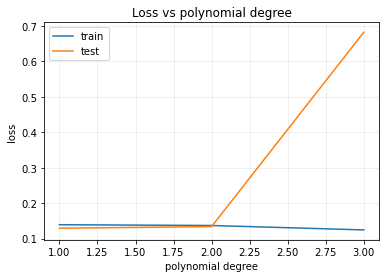

In [576]:
# Plot loss vs polynomial degree
fig = plt.figure()  
plt.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt.xlabel('polynomial degree')
plt.ylabel('loss')
plt.title('Loss vs polynomial degree')
plt.grid(axis='both', alpha=.25)
plt.legend()

plt.show()

In [577]:
print(J_train)
print(J_test)

[0.13929926 0.13708466 0.12462193]
[0.1293876  0.13397758 0.68200696]


In [578]:
print(rmse_list_train)
print(rmse_list_test)

[0.52782433 0.52361179 0.49924329]
[0.50869952 0.51764386 1.16791006]


In [579]:
print(r_squared_list_train)
print(r_squared_list_test)

[0.63529316 0.64109134 0.67372066]
[0.82499101 0.81878263 0.07752099]


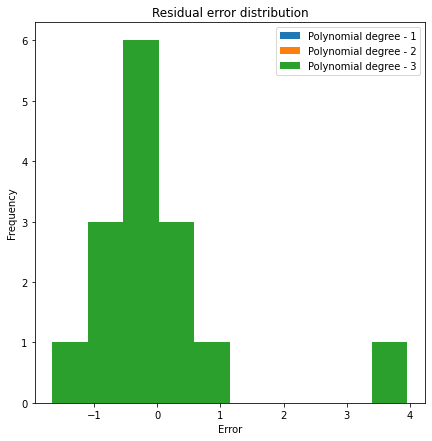

In [580]:
# Plot Testing residual error distribution
plt.figure(figsize=(7,7))
for i in range(1, max_degree+1):
    label_i = "Polynomial degree - " + str(i)
    plt.hist(residual_error_list[i-1], bins=10, label = label_i)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Residual error distribution')
plt.legend()

plt.show()

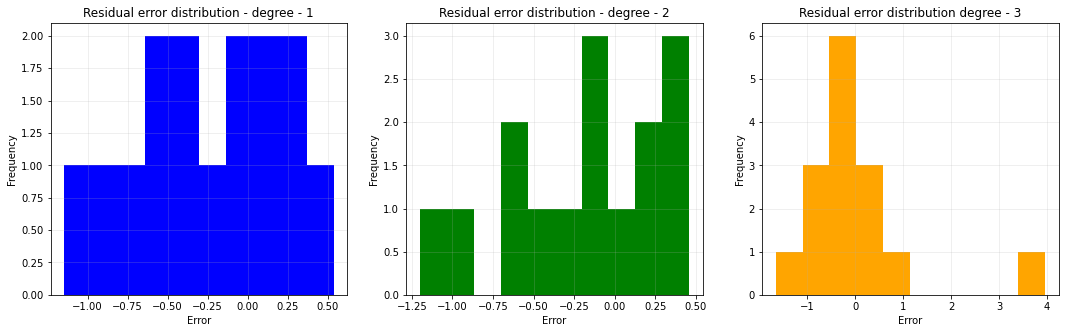

In [581]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)

plt1.hist(residual_error_list[0], bins=10, color = "blue")
plt1.set_title('Residual error distribution - degree - 1')
plt1.set_xlabel('Error')
plt1.set_ylabel('Frequency')
plt1.grid(axis='both', alpha=.25)

plt2.hist(residual_error_list[1], bins=10,color = "green")
plt2.set_title('Residual error distribution - degree - 2')
plt2.set_xlabel('Error')
plt2.set_ylabel('Frequency')
plt2.grid(axis='both', alpha=.25)

plt3.hist(residual_error_list[2], bins=10,color = "orange")
plt3.set_title('Residual error distribution degree - 3')
plt3.set_xlabel('Error')
plt3.set_ylabel('Frequency')
plt3.grid(axis='both', alpha=.25)

### Ploting the surfaces

3D plot: Polynomial degree 2 



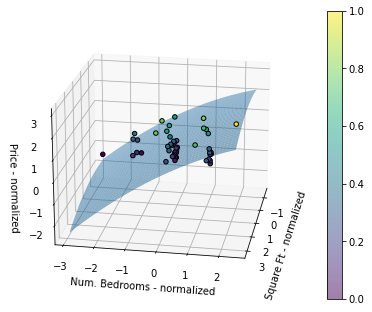

3D plot: Polynomial degree 3 



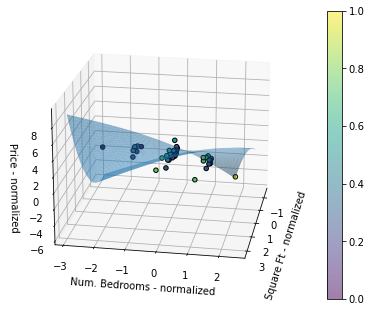

In [582]:
# Polynomial regression model d=2, 3
for i in range(2):
    Xi_train = x_polynomial(X_train, i + 2)    
    Xi_test = x_polynomial(X_test, i + 2)

    theta = regression(Xi_train, y_train)
    J_train = cost(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test = cost(theta, Xi_test, y_test)   

    # 3D plot
    print("3D plot: Polynomial degree",i + 2,"\n")
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    x_year = data_norm[:, 0]
    y_month = data_norm[:, 1]
    z_sale = data_norm[:, 2]

    # 3. plot by using scatter
    p = ax.scatter(x_year,y_month, z_sale,edgecolors='black', c=data_norm[:,2],alpha=1)

    # 4. set x, y, z label
    ax.set_xlabel('Square Ft - normalized')
    ax.set_ylabel('Num. Bedrooms - normalized')
    ax.set_zlabel('Price - normalized')

    # plot observation
    x_series = np.linspace(min(data_norm[:,0]), max(data_norm[:,0]),len(y_csv))
    y_series = np.linspace(min(data_norm[:,1]), max(data_norm[:,1]),len(y_csv))

    x_mesh, y_mesh = np.meshgrid(x_series, y_series)
    
    if i == 0: # degree 2
        yy =(theta[0] +theta[1]*x_mesh.T+theta[2]*y_mesh+theta[3]*(x_mesh*y_mesh)+theta[4]*(y_mesh**2+x_mesh**2))
    else: # degree 3
        yy=(theta[0]+theta[1]*(x_mesh+y_mesh).T+theta[2]*x_mesh*y_mesh +theta[3]*x_mesh**2+theta[4]*y_mesh**2+theta[5]* y_mesh*x_mesh**2+theta[6]*y_mesh**3)

    p = ax.plot_surface(x_mesh, y_mesh,yy,alpha=0.5)
    ax.view_init(elev=20, azim=10)
    plt.colorbar(p)
    plt.show()

### Exercise 3 - Discussion

In this exercise, I used `Housing_data.txt` from lab class 1. For this data, I evaluated polynomial regression models with degrees 1,2 and 3 with normalized data. Since the dataset has only 47 samples I used 70% of them in training and 30 % in testing.

For each polynomial model statistics such as `cost`, `RMSE` and $R^2$ were collected for both training and testing datasets. Also only for the training dataset, residual error data was collected at each degree.

- Cost comparison

| Polynomial degree  |  $J_{train}$ | $J_{test}$ |
| :----: | --- | --- | 
| 1 | 0.13929926 | 0.1293876 | 
| 2 | 0.13708466 | 0.13397758 | 
| 3 | 0.12462193 | 0.68200696 |  


- RMSE comparison


| Polynomial degree  | RMSE_train | RMSE_test |
| :----: | --- | --- | 
| 1 | 0.52782433 | 0.50869952 | 
| 2 | 0.52361179 | 0.51764386 | 
| 3 | 0.49924329 | 1.16791006 |  


- $R^2$ squared comparison


| Polynomial degree  | $R^2_{train}$ | $R^2_{test}$ |
| :----: | --- | --- | 
| 1 | 0.63529316 | 0.82499101 | 
| 2 | 0.64109134 | 0.81878263 | 
| 3 | 0.67372066 | 0.07752099 |  


When we compare the statistics we can observe that,
- At degree 1, the testing cost is slightly less than the training cost. Since this is a small dataset, this could be due to a sampling bias in the testdata set.
- At degree 2, the training cost is less than the testing cost, but the difference between them is very small.
- At degree 3, we can see that the testing cost significantly increases compared to the testing cost at degree 2. Further, there is a big disparity between training and testing costs at degree 3. This indicates that beyond degree 2 the model is overfitting. From 3D surface plots for polynomial degree 2 and 3 also it is evident that degree 3 is a very bad fit.
- From the RMSE and $R^2$ statistics also we can see that increasing the polynomial degree from 2 to 3, RMSE significantly increases and the goddess of fit ($R^2$) is decreasing (moving away from 1).
- To come to a conclusion about which polynomial degree out of degree 1 and 2 is better for this dataset we can analyze the residual error distribution plots. Only the degree 1 polynomial has residuals that are randomly scattered around zero. There is no clear reduction in residual errors at degree 2.
- Therefore, for this dataset linear regression model is better than polynomial regression.




